<a href="https://colab.research.google.com/github/byambaa1982/python_cources_for_beginers/blob/class_zero_burentugs/titanic_data_analysis/titanic_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import regex as re
import os

In [26]:
Ti_df = pd.read_csv('titanic.csv')
Ti_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Check for missing values
# df.isnull().sum()
Ti_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [28]:
Ti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
Ti_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# df.info()

In [6]:
# df.describe()

In [7]:
import matplotlib.pyplot as plt

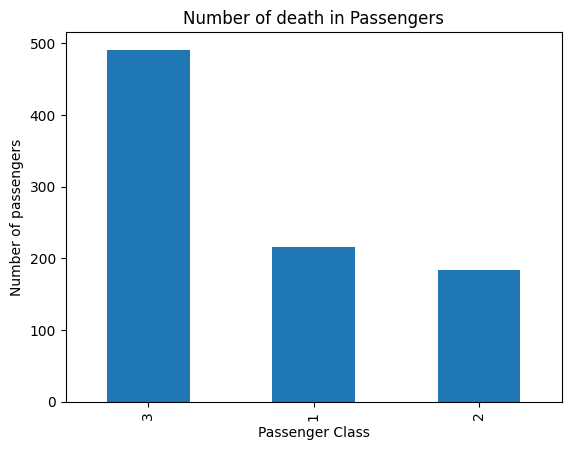

In [30]:
from types import prepare_class
# Count the number of passengers in each class
pclass_counts = Ti_df['Pclass'].value_counts()


pclass_counts.plot(kind='bar')
plt.title('Number of death in Passengers')
plt.xlabel('Passenger Class')
plt.ylabel('Number of passengers')
plt.show()

In [31]:
Ti_df[Ti_df['Sex']== 'male']['Survived'].value_counts()

,count
Survived,
0,468
1,109


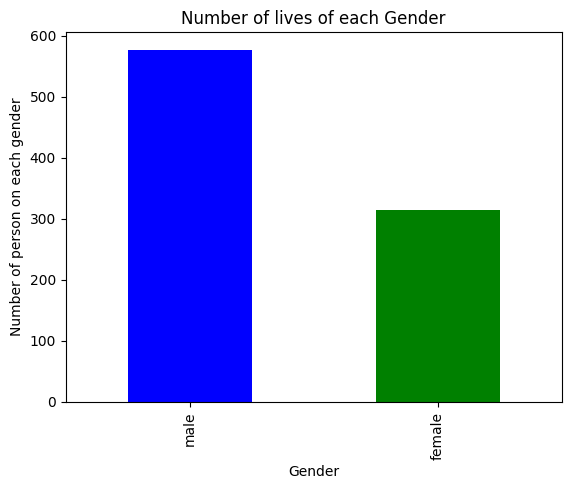

In [47]:
survived_man = Ti_df['Sex'].value_counts()

survived_man.plot(kind='bar', color= ["blue", "green", "black"])
plt.title('Number of lives of each Gender')
plt.xlabel('Gender')
plt.ylabel('Number of person on each gender')
plt.show()

# Titanic Data Analysis
1. How many people died?


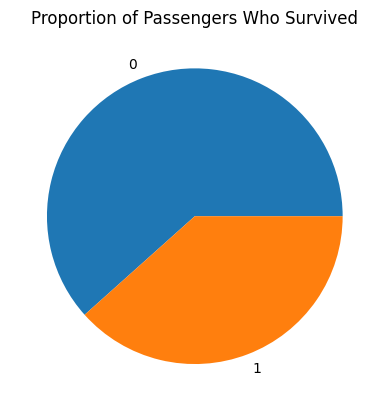

In [52]:
# Count the number of survivors and non-survivors
survived_counts = df['Survived'].value_counts()

# Create a pie chart
survived_counts.plot(kind='pie')
plt.title('Proportion of Passengers Who Survived')
plt.ylabel('')
plt.show()